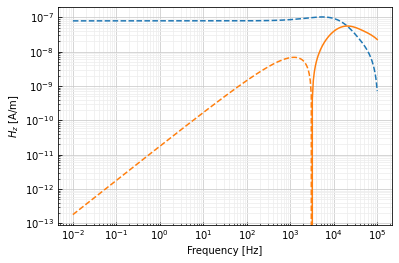

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from emulatte.forward import model, transceiver, w1dem

#w1dem1.0
thicks = np.array([20, 5, 2, 5])
res = np.array([100, 80, 10, 80, 100])
sc = np.array([0, 0, 0])
rc = np.array([100, 0, 0])
freqtime = np.logspace(-2, 5, 301)

model = model.Subsurface1D(thicks)
model.add_resistivity(res)
vmd = transceiver.VMD()
model.locate(vmd, sc, rc)
ans = model.run(freqtime, hankel_filter='key201')


#w1dem0.0
fdtd = 1
transmitter = 1
tx = [0]
ty = [0]
tz = [0]
rx = [100]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = [20, 5, 2, 5]
res = np.array([100, 80, 10, 80, 100])
freqtime = np.logspace(-2, 5, 301)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.vmd(dipole_mom)



resp = ans['h_z'].real
imsp = ans['h_z'].imag
plt.plot(freqtime, resp, "C0-", label='real')
plt.plot(freqtime, -resp, "C0--")
plt.plot(freqtime, imsp, "C1-", label='imaginary')
plt.plot(freqtime, -imsp, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

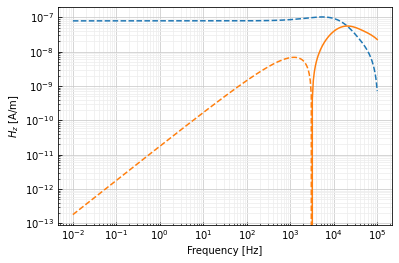

In [6]:
respb = bns['h_z'].real
imspb = bns['h_z'].imag
plt.plot(freqtime, respb, "C0-", label='real')
plt.plot(freqtime, -respb, "C0--")
plt.plot(freqtime, imspb, "C1-", label='imaginary')
plt.plot(freqtime, -imspb, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend
plt.show()

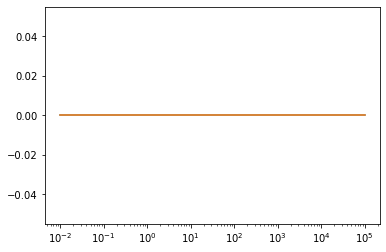

In [7]:
respe = abs(resp-respb)/respb * 100
imspe = abs(imsp-imspb)/imspb * 100
plt.plot(freqtime, imspe)
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [6]:
import numpy as np
ztilde = np.ones((1, 10, 1), dtype=complex)

ztilde[0,1::,0]

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j])